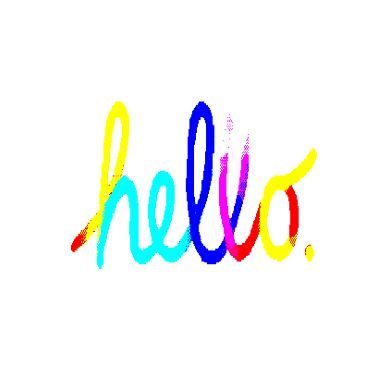

In [26]:
import tensorflow as tf
from tensorflow.keras.applications import vgg19
from tensorflow.keras.preprocessing import image as keras_image
import numpy as np
import matplotlib.pyplot as plt

def load_and_preprocess_image(image_path, img_height, img_width):
    img = keras_image.load_img(image_path, target_size=(img_height, img_width))
    img = keras_image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = vgg19.preprocess_input(img)
    return img

def tensor_to_image(tensor):
    tensor = tensor * 255
    tensor = np.clip(tensor, 0, 255).astype('uint8')
    return tensor[0]

style_image_path = 'hello.jpeg'
content_image_path = 'style.jpeg'

img_height = 400
img_width = 400


style_image = load_and_preprocess_image(style_image_path, img_height, img_width)
content_image = load_and_preprocess_image(content_image_path, img_height, img_width)


generated_image = tf.Variable(content_image, dtype=tf.float32)

optimizer = tf.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)

final_image = tensor_to_image(generated_image.numpy())

plt.imshow(final_image)
plt.axis('off')
plt.show()
